In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib
#!pip install pmdarima
import pmdarima as pm
from datetime import datetime
from email.message import EmailMessage
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [13]:

 
# Read the Excel file
file_path = '/kaggle/input/sol-data/SOL_1Y_graph_coinmarketcap.xlsx'
# Define the columns to read (1-13 and 26)
usecols = list(range(1, 5)) + [7]

df = pd.read_excel(file_path, usecols=usecols)
# Read the CSV file
#df = pd.read_csv(file_path, usecols=range(6, 8), skiprows=0, nrows=288)

# Display the first few rows of the DataFrame
print(df.head())
 

        open       high        low      close            timestamp
0  19.452413  22.403002  18.498629  21.349004  2023-07-03 00:00:00
1  21.347788  30.057695  20.572587  27.384083  2023-07-10 00:00:00
2  27.385769  28.380919  24.250967  24.766816  2023-07-17 00:00:00
3  24.765521  25.586377  22.864363  24.261019  2023-07-24 00:00:00
4  24.261839  24.750184  22.327997  23.185696  2023-07-31 00:00:00


Figure 1: Solana Price Data.


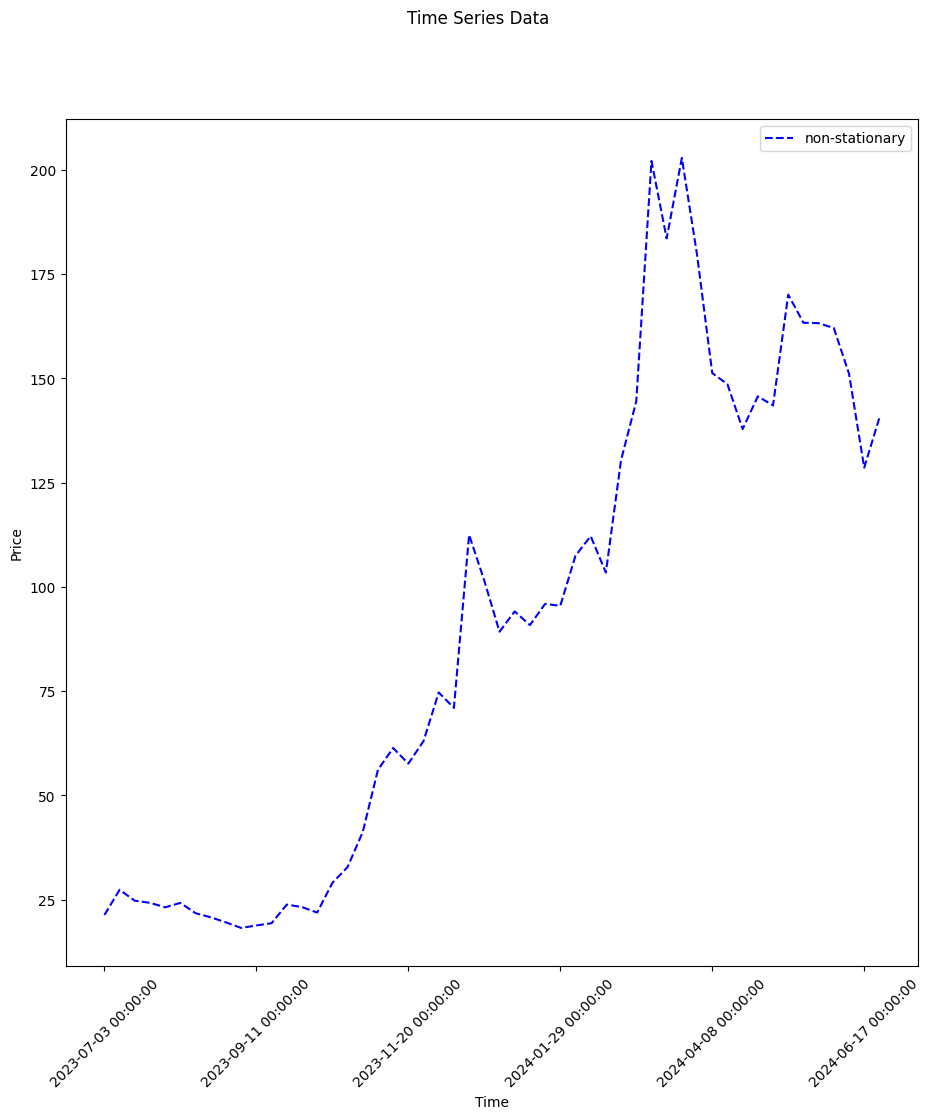

/kaggle/working/SOL_Plot.png

In [14]:
# Plotting the time series data
fig, ax = plt.subplots(figsize=(11,11))
data1 = df['close']
series3 = df.set_index('timestamp')['close']

fig.suptitle('Time Series Data')
series3.plot(ax=ax, color="blue",linestyle='--',  label='non-stationary',subplots=True, layout=(1,1))
#ax.plot(series3,'g-.', linestyle='--', label='non-stationary',subplots=True, layout=(1,1))

# Adding labels and legend  df[["dk54d"]]
ax.set_xlabel('Time')
ax.set_ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlapping
ax.legend(loc='upper right')
print("Figure 1: Solana Price Data.")
#ax.legend(loc=2)
 
# Save the figure to a file in the notebook's filesystem
plt.savefig('/kaggle/working/SOL_Plot.png', dpi=300)

# Display the plot
plt.show()

# To download the file, use the following code:
from IPython.display import FileLink

# Create a link to download the file
FileLink(r'/kaggle/working/SOL_Plot.png')
